In [1]:
### Don't mind about this 
import warnings
warnings.filterwarnings('ignore')
###

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # I will use the Sklearn to get kNN
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
import math
from statistics import mode

In [2]:
digits_X = pd.read_csv('mnist_train.csv') #put the data in pd Frame
digits_X.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Separate the Label from the Training Data
train_Y = digits_X['label']
train_X = digits_X.iloc[:,1:] 

In [4]:
print(train_X.shape)
print(train_Y.shape)

(60000, 784)
(60000,)


In [5]:
Test_X = pd.read_csv('mnist_test.csv') #put the data in pd Frame
Test_X.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_Y = Test_X['label']
test_X = Test_X.iloc[:,1:]

In [7]:
test_X.shape

(10000, 784)

In [8]:
X = train_X.iloc[:300,]
X = np.array(X)

In [9]:
from sklearn import preprocessing

scalar = preprocessing.StandardScaler()
#scalar.fit(X)
Scaled_x = scalar.fit_transform(X)

X = pd.DataFrame(Scaled_x,columns = train_X.columns)

In [10]:
X = np.array(X)

In [11]:
Similarity_Table =[]
for P1 in range(len(X)):
    temp = []
    for P2 in range(len(X)):
        if(P1 ==P2):
            temp.append(0)
        else:
            dist =np.sum((X[P1] - X[P2]) ** 2, axis=0)
            temp.append(-1*dist)
    if(len(temp) !=0):
        Similarity_Table.append(temp)
    print("Loop",P1)


Loop 0
Loop 1
Loop 2
Loop 3
Loop 4
Loop 5
Loop 6
Loop 7
Loop 8
Loop 9
Loop 10
Loop 11
Loop 12
Loop 13
Loop 14
Loop 15
Loop 16
Loop 17
Loop 18
Loop 19
Loop 20
Loop 21
Loop 22
Loop 23
Loop 24
Loop 25
Loop 26
Loop 27
Loop 28
Loop 29
Loop 30
Loop 31
Loop 32
Loop 33
Loop 34
Loop 35
Loop 36
Loop 37
Loop 38
Loop 39
Loop 40
Loop 41
Loop 42
Loop 43
Loop 44
Loop 45
Loop 46
Loop 47
Loop 48
Loop 49
Loop 50
Loop 51
Loop 52
Loop 53
Loop 54
Loop 55
Loop 56
Loop 57
Loop 58
Loop 59
Loop 60
Loop 61
Loop 62
Loop 63
Loop 64
Loop 65
Loop 66
Loop 67
Loop 68
Loop 69
Loop 70
Loop 71
Loop 72
Loop 73
Loop 74
Loop 75
Loop 76
Loop 77
Loop 78
Loop 79
Loop 80
Loop 81
Loop 82
Loop 83
Loop 84
Loop 85
Loop 86
Loop 87
Loop 88
Loop 89
Loop 90
Loop 91
Loop 92
Loop 93
Loop 94
Loop 95
Loop 96
Loop 97
Loop 98
Loop 99
Loop 100
Loop 101
Loop 102
Loop 103
Loop 104
Loop 105
Loop 106
Loop 107
Loop 108
Loop 109
Loop 110
Loop 111
Loop 112
Loop 113
Loop 114
Loop 115
Loop 116
Loop 117
Loop 118
Loop 119
Loop 120
Loop 121
Loop 122
Loo

In [12]:
Similarity_Table = np.array(Similarity_Table)

In [13]:
df = pd.DataFrame(Similarity_Table)
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,-1376.043266,-2929.702234,-1331.649735,-1636.886089,-1503.118505,-1316.422007,-1138.625565,-1275.651044,-1487.184756,...,-1292.463698,-1256.635871,-1347.417227,-1704.287023,-3716.103561,-1262.500877,-1631.606419,-1482.513452,-1429.088234,-1733.840301
1,-1376.043266,0.000000,-2344.169464,-778.251865,-916.464328,-830.625085,-833.760384,-750.292147,-749.315862,-1059.707267,...,-711.176454,-726.066824,-787.679100,-468.914177,-2706.509999,-664.086883,-544.533818,-896.945799,-1044.215259,-862.713860
2,-2929.702234,-2344.169464,0.000000,-2119.502060,-2332.390240,-2286.830044,-2129.067773,-2222.738027,-2042.198443,-2210.961961,...,-2096.090684,-2347.006008,-2137.692443,-2660.889390,-2819.075451,-2126.624309,-2405.081271,-2044.263679,-2375.035604,-2449.270336
3,-1331.649735,-778.251865,-2119.502060,0.000000,-748.137743,-717.139293,-523.463038,-671.874832,-425.650975,-824.436532,...,-261.561077,-522.901537,-549.907631,-1193.913623,-2691.304038,-438.391849,-965.915211,-764.940791,-913.248602,-912.482345
4,-1636.886089,-916.464328,-2332.390240,-748.137743,0.000000,-843.406644,-678.337809,-942.089238,-559.076483,-1011.614157,...,-734.625222,-937.734414,-635.433495,-1346.004520,-2823.657558,-762.686621,-1098.785669,-840.511897,-1108.095427,-1035.597181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1262.500877,-664.086883,-2126.624309,-438.391849,-762.686621,-725.713956,-505.473347,-562.571732,-421.492229,-761.815878,...,-459.069980,-523.941215,-508.438141,-971.059278,-2729.900974,0.000000,-966.869317,-609.352628,-906.160458,-912.639724
296,-1631.606419,-544.533818,-2405.081271,-965.915211,-1098.785669,-1068.575212,-923.832661,-999.108375,-920.359697,-1269.852356,...,-924.431696,-1026.173150,-948.903015,-588.771855,-2689.555203,-966.869317,0.000000,-1087.905526,-1165.136307,-844.482411
297,-1482.513452,-896.945799,-2044.263679,-764.940791,-840.511897,-902.544420,-777.380887,-863.839804,-663.651382,-484.104472,...,-726.642109,-915.972592,-627.623998,-1161.058521,-2643.009826,-609.352628,-1087.905526,0.000000,-1194.172197,-970.187022
298,-1429.088234,-1044.215259,-2375.035604,-913.248602,-1108.095427,-1052.512714,-707.080580,-846.945772,-702.730346,-1229.193687,...,-762.966234,-857.328962,-771.130589,-1225.943309,-2930.142904,-906.160458,-1165.136307,-1194.172197,0.000000,-1281.820237


In [14]:
Similarity_Table.shape

(300, 300)

## Do the Algorithm to Calculate The Responsibility and Availability.

In [15]:
def AffanityProp(s,damping,do_dumping):

    n = len(s)
    a = np.zeros((n,n))
    r = np.zeros((n,n))
    
    for num_iterations in range(60):
        r_old = r.copy()
        a_old = a.copy()
        for i in range(n):
            for k in range(n):
                
                temp_s = np.hstack((s[i,:k],s[i,k+1:]))
                temp_a = np.hstack((a[i,:k],a[i,k+1:]))
                r[i,k] = s[i,k] - np.amax(temp_s + temp_a)

        #Fill availibility 

        for i in range(n):
            for k in range(n):
                if(k == i):
                    t_a = np.hstack((r[:i,i],r[i+1:,i]))
                    zero = np.zeros(len(t_a))
                    a[i,i] = sum(np.maximum(zero,t_a))
                    continue

                a_mx = np.hstack((r[:i,k],r[i+1:,k]))
                zero = np.zeros(len(a_mx))
                a_mx = np.maximum(a_mx,zero)
                a[i,k] = min(0,r[k,k] + sum(a_mx))
        
        if(do_dumping):
            if(num_iterations !=0):
                r = damping*r_old+ (1-damping)*r
                a = damping*a_old+ (1-damping)*a
           
    
    return a,r

In [16]:
lst = []
#create the list
Similarity_Table = pd.DataFrame(Similarity_Table)
minimum = min(Similarity_Table.min())

lst.append(minimum)
lst.append(minimum/2)
lst.append(max(Similarity_Table.min())/2)
lst.append(0)
lst.sort()
lst.reverse()
lst

[0, -1753.9007819431695, -2939.001899761778, -5878.003799523556]

# With Dumping Factor

### Run With all possible Ones

In [17]:
Similarity_Table = pd.DataFrame(Similarity_Table)
Similarity_Table.replace(0,min(Similarity_Table.min())/2,inplace=True)

Similarity_Table

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-2939.001900,-1376.043266,-2929.702234,-1331.649735,-1636.886089,-1503.118505,-1316.422007,-1138.625565,-1275.651044,-1487.184756,...,-1292.463698,-1256.635871,-1347.417227,-1704.287023,-3716.103561,-1262.500877,-1631.606419,-1482.513452,-1429.088234,-1733.840301
1,-1376.043266,-2939.001900,-2344.169464,-778.251865,-916.464328,-830.625085,-833.760384,-750.292147,-749.315862,-1059.707267,...,-711.176454,-726.066824,-787.679100,-468.914177,-2706.509999,-664.086883,-544.533818,-896.945799,-1044.215259,-862.713860
2,-2929.702234,-2344.169464,-2939.001900,-2119.502060,-2332.390240,-2286.830044,-2129.067773,-2222.738027,-2042.198443,-2210.961961,...,-2096.090684,-2347.006008,-2137.692443,-2660.889390,-2819.075451,-2126.624309,-2405.081271,-2044.263679,-2375.035604,-2449.270336
3,-1331.649735,-778.251865,-2119.502060,-2939.001900,-748.137743,-717.139293,-523.463038,-671.874832,-425.650975,-824.436532,...,-261.561077,-522.901537,-549.907631,-1193.913623,-2691.304038,-438.391849,-965.915211,-764.940791,-913.248602,-912.482345
4,-1636.886089,-916.464328,-2332.390240,-748.137743,-2939.001900,-843.406644,-678.337809,-942.089238,-559.076483,-1011.614157,...,-734.625222,-937.734414,-635.433495,-1346.004520,-2823.657558,-762.686621,-1098.785669,-840.511897,-1108.095427,-1035.597181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1262.500877,-664.086883,-2126.624309,-438.391849,-762.686621,-725.713956,-505.473347,-562.571732,-421.492229,-761.815878,...,-459.069980,-523.941215,-508.438141,-971.059278,-2729.900974,-2939.001900,-966.869317,-609.352628,-906.160458,-912.639724
296,-1631.606419,-544.533818,-2405.081271,-965.915211,-1098.785669,-1068.575212,-923.832661,-999.108375,-920.359697,-1269.852356,...,-924.431696,-1026.173150,-948.903015,-588.771855,-2689.555203,-966.869317,-2939.001900,-1087.905526,-1165.136307,-844.482411
297,-1482.513452,-896.945799,-2044.263679,-764.940791,-840.511897,-902.544420,-777.380887,-863.839804,-663.651382,-484.104472,...,-726.642109,-915.972592,-627.623998,-1161.058521,-2643.009826,-609.352628,-1087.905526,-2939.001900,-1194.172197,-970.187022
298,-1429.088234,-1044.215259,-2375.035604,-913.248602,-1108.095427,-1052.512714,-707.080580,-846.945772,-702.730346,-1229.193687,...,-762.966234,-857.328962,-771.130589,-1225.943309,-2930.142904,-906.160458,-1165.136307,-1194.172197,-2939.001900,-1281.820237


## Run the algorthm using the diagonal with min value/2 to get  10 Clusters

In [18]:
a,r = AffanityProp(np.array(Similarity_Table),0.8,1)

In [19]:
rdf = pd.DataFrame(r)
rdf


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1799.097759,-236.848020,-1790.506988,-192.454489,-497.690843,-363.923259,-177.226761,59.842356,-136.455798,-347.989510,...,-153.268452,-117.440625,-208.221981,-565.091777,-2576.908315,-123.305631,-492.411173,-343.318206,-289.892988,-594.645055
1,-1528.062659,-2267.770991,-2496.188857,-930.271258,-1068.483721,-982.644478,-985.779777,-902.311541,-901.335255,-1211.726660,...,-863.195847,-878.086217,-939.698493,-620.933570,-2858.529392,-816.106276,-696.553212,-1048.965192,-1196.234652,-1014.733253
2,-922.717785,-337.185015,-931.785016,-112.517612,-325.405791,-279.845596,-122.083325,-215.753579,-35.213995,-203.977513,...,-89.106236,-340.021559,-130.707994,-653.904942,-812.091002,-119.639861,-398.096822,-37.279230,-368.051156,-442.285887
3,-1031.199045,-477.801175,-1819.051370,-2634.247341,-447.687053,-416.688603,-223.012348,-371.424142,-125.200285,-523.985842,...,38.889613,-222.450847,-249.456941,-893.462933,-2390.853348,-137.941159,-665.464521,-464.490101,-612.797912,-612.031655
4,-1097.041365,-376.619604,-1792.545515,-208.293019,-2397.936371,-303.561920,-138.493085,-402.244513,-19.231759,-471.769433,...,-194.780498,-397.889690,-95.588770,-806.159796,-2283.812834,-222.841897,-558.940945,-300.667173,-568.250702,-495.752456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-840.140163,-241.726169,-1704.263595,-16.031135,-340.325907,-303.353242,-83.112633,-140.211018,0.868485,-339.455164,...,-36.709266,-101.580501,-86.077427,-548.698564,-2307.540260,-2512.180382,-544.508603,-186.991914,-483.799744,-490.279010
296,-1086.219316,276.931305,-1859.694168,-420.528108,-553.398567,-523.188109,-378.445559,-453.721272,-374.972594,-724.465253,...,-379.044593,-480.786048,-403.515913,-43.384752,-2144.168100,-421.482214,-2392.512921,-542.518423,-619.749204,-299.095308
297,-1131.800337,-546.232684,-1693.550564,-414.227676,-489.798783,-551.831305,-426.667772,-513.126690,-312.938267,-133.391358,...,-375.928995,-565.259477,-276.910884,-810.345406,-2292.296711,-258.639513,-737.192411,-2586.791666,-843.459082,-619.473908
298,-1139.066316,-754.193341,-2085.013686,-623.226684,-818.073508,-762.490795,-417.058662,-556.923854,-412.708428,-939.171769,...,-472.944315,-567.307044,-481.108670,-935.921391,-2640.120985,-616.138540,-875.114388,-904.150279,-2162.104205,-991.798319


In [20]:
adf = pd.DataFrame(a)
adf


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.251309,-0.140059,-931.785632,-846.088793,-1735.957548,-1110.553034,-1452.156913,-0.116758,-1235.015522,-2245.469385,...,-1738.918354,-892.242289,-2277.387791,-2361.151710,-416.299457,-1060.027019,-1992.234802,-2171.593432,-0.102849,-1689.374774
1,-1799.022384,3045.004270,-931.785632,-846.088793,-1735.957548,-1110.553034,-1452.154596,-0.116758,-1235.015522,-2245.464585,...,-1738.918354,-892.214255,-2277.387791,-2361.151710,-416.299457,-1059.991925,-1992.234802,-2171.593432,-0.102849,-1689.374774
2,-1799.022384,-0.140059,0.068638,-846.089062,-1735.957548,-1110.553034,-1452.154662,-0.116758,-1235.017436,-2245.464585,...,-1738.919122,-892.214255,-2277.387791,-2361.151710,-416.299457,-1059.994314,-1992.234802,-2171.618426,-0.102849,-1689.374774
3,-1799.022384,-0.140059,-931.785632,1790.083641,-1735.957548,-1110.553034,-1452.154596,-0.116758,-1235.015522,-2245.464585,...,-1781.769887,-892.214255,-2277.387791,-2361.151710,-416.299457,-1059.991925,-1992.234802,-2171.593432,-0.102849,-1689.374774
4,-1799.022384,-0.140059,-931.785632,-846.088793,662.499188,-1110.553034,-1452.156214,-0.116758,-1235.194764,-2245.464585,...,-1738.918354,-892.214255,-2277.415857,-2361.151710,-416.299457,-1059.991925,-1992.234802,-2171.593432,-0.102849,-1689.374774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1799.022384,-0.140059,-931.785632,-846.146984,-1735.957548,-1110.553034,-1452.154596,-0.116758,-1239.769427,-2245.464585,...,-1738.918354,-892.214255,-2277.387791,-2361.151710,-416.299457,1453.821786,-1992.234802,-2171.593432,-0.102849,-1689.374774
296,-1799.022384,-0.193738,-931.785632,-846.088793,-1735.957548,-1110.553034,-1452.154596,-0.116758,-1235.015522,-2245.464585,...,-1738.918354,-892.214255,-2277.387791,-2361.447732,-416.299457,-1059.991925,400.697838,-2171.593432,-0.102849,-1689.374774
297,-1799.022384,-0.140059,-931.785632,-846.088793,-1735.957548,-1110.553034,-1452.154596,-0.116758,-1235.015522,-2246.068077,...,-1738.918354,-892.214255,-2277.387791,-2361.151710,-416.299457,-1060.001712,-1992.234802,415.960172,-0.102849,-1689.374774
298,-1799.022384,-0.140059,-931.785632,-846.088793,-1735.957548,-1110.553034,-1452.154596,-0.116758,-1235.015522,-2245.464585,...,-1738.918354,-892.214255,-2277.387791,-2361.151710,-416.299457,-1059.991925,-1992.234802,-2171.593432,2599.164911,-1689.374774


In [21]:
c = r + a
cdf = pd.DataFrame(c)
cdf

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1798.846451,-236.988078,-2722.292620,-1038.543282,-2233.648391,-1474.476292,-1629.383674,59.725598,-1371.471321,-2593.458895,...,-1892.186806,-1009.682914,-2485.609772,-2926.243487,-2993.207772,-1183.332650,-2484.645975,-2514.911638,-289.995837,-2284.019829
1,-3327.085043,777.233279,-3427.974489,-1776.360051,-2804.441269,-2093.197512,-2437.934373,-902.428299,-2136.350777,-3457.191246,...,-2602.114201,-1770.300472,-3217.086284,-2982.085280,-3274.828849,-1876.098201,-2688.788014,-3220.558624,-1196.337501,-2704.108027
2,-2721.740170,-337.325074,-931.716378,-958.606674,-2061.363339,-1390.398629,-1574.237987,-215.870337,-1270.231430,-2449.442098,...,-1828.025358,-1232.235815,-2408.095785,-3015.056652,-1228.390459,-1179.634174,-2390.331625,-2208.897656,-368.154005,-2131.660661
3,-2830.221430,-477.941234,-2750.837003,-844.163700,-2183.644601,-1527.241636,-1675.166944,-371.540900,-1360.215807,-2769.450427,...,-1742.880273,-1114.665102,-2526.844731,-3254.614643,-2807.152805,-1197.933083,-2657.699323,-2636.083533,-612.900761,-2301.406429
4,-2896.063749,-376.759662,-2724.331148,-1054.381812,-1735.437183,-1414.114953,-1590.649298,-402.361272,-1254.426523,-2717.234018,...,-1933.698852,-1290.103945,-2373.004627,-3167.311506,-2700.112291,-1282.833821,-2551.175748,-2472.260605,-568.353551,-2185.127230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-2639.162547,-241.866228,-2636.049227,-862.178119,-2076.283455,-1413.906276,-1535.267229,-140.327777,-1238.900942,-2584.919749,...,-1775.627620,-993.794756,-2363.465217,-2909.850274,-2723.839717,-1058.358596,-2536.743405,-2358.585346,-483.902593,-2179.653784
296,-2885.241700,276.737567,-2791.479801,-1266.616901,-2289.356114,-1633.741143,-1830.600155,-453.838030,-1609.988116,-2969.929838,...,-2117.962947,-1373.000303,-2680.903704,-2404.832484,-2560.467557,-1481.474139,-1991.815083,-2714.111855,-619.852053,-1988.470082
297,-2930.822721,-546.372743,-2625.336197,-1260.316469,-2225.756330,-1662.384339,-1878.822368,-513.243448,-1547.953789,-2379.459434,...,-2114.847349,-1457.473733,-2554.298674,-3171.497116,-2708.596168,-1318.641225,-2729.427214,-2170.831494,-843.561931,-2308.848682
298,-2938.088700,-754.333400,-3016.799318,-1469.315477,-2554.031056,-1873.043829,-1869.213258,-557.040612,-1647.723950,-3184.636354,...,-2211.862670,-1459.521299,-2758.496461,-3297.073100,-3056.420442,-1676.130465,-2867.349191,-3075.743711,437.060706,-2681.173093


In [22]:
ClusterPoints = np.zeros(len(c))
for row in range(len(c)):
    ClusterPoints[row] = np.argmax(c[row,])

In [23]:
Clusters = np.unique(ClusterPoints)
Clusters

array([  1.,   7.,  26.,  39., 195., 220., 276., 283., 289., 298.])

## 1.F. Calculating the accuracy, Precision, and Recall

In [24]:
from sklearn.metrics import classification_report

mapper = {}

for i in Clusters:
    mapper[i]=train_Y[i]

y_pred = []

for i in (ClusterPoints):
    y_pred.append(mapper[i])
    

In [25]:
mapper

{1.0: 0,
 7.0: 3,
 26.0: 4,
 39.0: 6,
 195.0: 9,
 220.0: 2,
 276.0: 1,
 283.0: 0,
 289.0: 4,
 298.0: 3}

In [26]:
y_pred = []

for i in (ClusterPoints):
    y_pred.append(mapper[i])
    


In [27]:
from sklearn.metrics import classification_report
print(classification_report(train_Y[:300], np.array(y_pred)))

             precision    recall  f1-score   support

          0       0.96      0.79      0.87        34
          1       0.43      0.95      0.59        39
          2       1.00      0.04      0.07        28
          3       0.57      0.74      0.64        34
          4       0.38      0.78      0.52        32
          5       0.00      0.00      0.00        23
          6       0.64      0.86      0.74        29
          7       0.00      0.00      0.00        29
          8       0.00      0.00      0.00        21
          9       0.25      0.29      0.27        31

avg / total       0.45      0.50      0.41       300



In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(train_Y[:300], np.array(y_pred))

0.49666666666666665

## 1.G Showing the images

In [29]:
x = list(Clusters)

x

[1.0, 7.0, 26.0, 39.0, 195.0, 220.0, 276.0, 283.0, 289.0, 298.0]

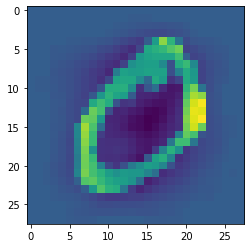

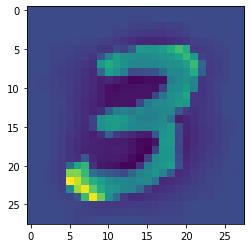

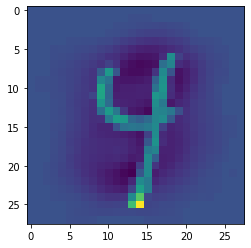

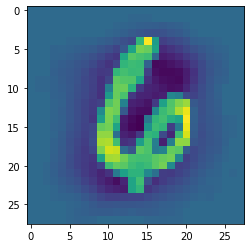

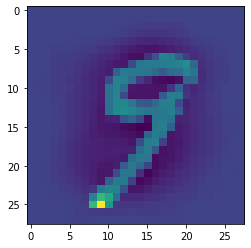

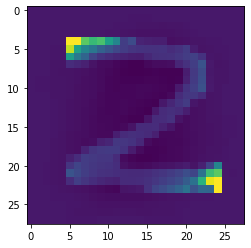

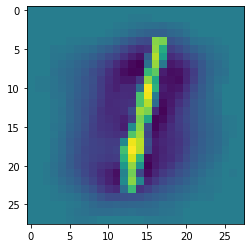

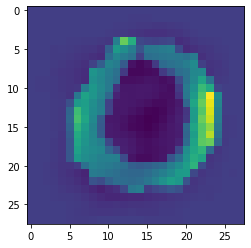

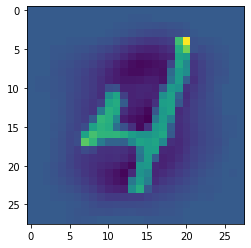

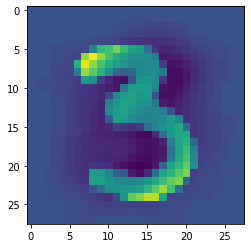

In [30]:
for exampler in list(Clusters):
    exampler
    plt.imshow(X[int(exampler)].reshape(28,28))
    plt.show()
    

## Without Dumping Factor [Many Oscillations ? Problem] 

In [32]:
a,r = AffanityProp(np.array(Similarity_Table),0.8,0)

In [33]:
rdf = pd.DataFrame(r)
rdf


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,685.875976,1562.958634,9.299666,1607.352165,1302.115811,1435.883395,1622.579892,1800.376335,1663.350855,1451.817144,...,1646.538202,1682.366029,1591.584673,1234.714877,-777.101661,1676.501023,1307.395481,1456.488448,1509.913666,1205.161598
1,1562.958634,0.000000,594.832436,2160.750035,2022.537572,2108.376815,2105.241516,2188.709752,2189.686038,1879.294633,...,2227.825446,2212.935076,2151.322800,2470.087723,232.491901,2274.915017,2394.468081,2042.056101,1894.786640,2076.288039
2,9.299666,594.832436,875.265225,819.499839,606.611660,652.171856,809.934127,716.263873,896.803456,728.039938,...,842.911215,591.995892,801.309457,278.112509,119.926449,812.377591,533.920629,894.738221,563.966296,489.731564
3,1607.352165,2160.750035,819.499839,0.000000,2190.864157,2221.862607,2415.538862,2267.127068,2513.350925,2114.565368,...,2677.440823,2416.100363,2389.094269,1745.088277,247.697861,2500.610051,1973.086689,2174.061109,2025.753298,2026.519555
4,1302.115811,2022.537572,606.611660,2190.864157,91.816565,2095.595256,2260.664091,1996.912662,2379.925417,1927.387743,...,2204.376678,2001.267486,2303.568405,1592.997380,115.344342,2176.315279,1840.216231,2098.490002,1830.906473,1903.404719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1676.501023,2274.915017,812.377591,2500.610051,2176.315279,2213.287944,2433.528553,2376.430167,2517.509671,2177.186022,...,2479.931920,2415.060685,2430.563759,1967.942621,209.100926,0.000000,1972.132583,2329.649272,2032.841441,2026.362175
296,1307.395481,2394.468081,533.920629,1973.086689,1840.216231,1870.426688,2015.169239,1939.893525,2018.642203,1669.149544,...,2014.570204,1912.828749,1990.098884,2350.230045,249.446697,1972.132583,0.000000,1851.096374,1773.865593,2094.519489
297,1456.488448,2042.056101,894.738221,2174.061109,2098.490002,2036.457480,2161.621013,2075.162095,2275.350518,2454.897427,...,2212.359790,2023.029308,2311.377902,1777.943379,295.992074,2329.649272,1851.096374,0.000000,1744.829703,1968.814877
298,1509.913666,1894.786640,563.966296,2025.753298,1830.906473,1886.489186,2231.921320,2092.056127,2236.271553,1709.808213,...,2176.035666,2081.672937,2167.871311,1713.058591,8.858996,2032.841441,1773.865593,1744.829703,0.000000,1657.181663


In [34]:
adf = pd.DataFrame(a)
adf


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,406658.561734,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,592875.886084,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,181675.647218,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,636795.600814,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,577130.494108,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,632655.398928,0.000000,0.000000,0.000000,0.000000
296,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,546423.364422,0.000000,0.000000,0.000000
297,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,582516.838629,0.000000,0.000000
298,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,564522.728553,0.000000


In [35]:
c = r + a
cdf = pd.DataFrame(c)
cdf

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,407344.437710,1562.958634,9.299666,1607.352165,1302.115811,1435.883395,1622.579892,1800.376335,1663.350855,1451.817144,...,1646.538202,1682.366029,1591.584673,1234.714877,-777.101661,1676.501023,1307.395481,1456.488448,1509.913666,1205.161598
1,1562.958634,592875.886084,594.832436,2160.750035,2022.537572,2108.376815,2105.241516,2188.709752,2189.686038,1879.294633,...,2227.825446,2212.935076,2151.322800,2470.087723,232.491901,2274.915017,2394.468081,2042.056101,1894.786640,2076.288039
2,9.299666,594.832436,182550.912443,819.499839,606.611660,652.171856,809.934127,716.263873,896.803456,728.039938,...,842.911215,591.995892,801.309457,278.112509,119.926449,812.377591,533.920629,894.738221,563.966296,489.731564
3,1607.352165,2160.750035,819.499839,636795.600814,2190.864157,2221.862607,2415.538862,2267.127068,2513.350925,2114.565368,...,2677.440823,2416.100363,2389.094269,1745.088277,247.697861,2500.610051,1973.086689,2174.061109,2025.753298,2026.519555
4,1302.115811,2022.537572,606.611660,2190.864157,577222.310673,2095.595256,2260.664091,1996.912662,2379.925417,1927.387743,...,2204.376678,2001.267486,2303.568405,1592.997380,115.344342,2176.315279,1840.216231,2098.490002,1830.906473,1903.404719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1676.501023,2274.915017,812.377591,2500.610051,2176.315279,2213.287944,2433.528553,2376.430167,2517.509671,2177.186022,...,2479.931920,2415.060685,2430.563759,1967.942621,209.100926,632655.398928,1972.132583,2329.649272,2032.841441,2026.362175
296,1307.395481,2394.468081,533.920629,1973.086689,1840.216231,1870.426688,2015.169239,1939.893525,2018.642203,1669.149544,...,2014.570204,1912.828749,1990.098884,2350.230045,249.446697,1972.132583,546423.364422,1851.096374,1773.865593,2094.519489
297,1456.488448,2042.056101,894.738221,2174.061109,2098.490002,2036.457480,2161.621013,2075.162095,2275.350518,2454.897427,...,2212.359790,2023.029308,2311.377902,1777.943379,295.992074,2329.649272,1851.096374,582516.838629,1744.829703,1968.814877
298,1509.913666,1894.786640,563.966296,2025.753298,1830.906473,1886.489186,2231.921320,2092.056127,2236.271553,1709.808213,...,2176.035666,2081.672937,2167.871311,1713.058591,8.858996,2032.841441,1773.865593,1744.829703,564522.728553,1657.181663


In [36]:
ClusterPoints = np.zeros(len(c))
for row in range(len(c)):
    ClusterPoints[row] = np.argmax(c[row,])
ClusterPoints

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15